## Global Temperature Change Analysis
### Onur Can
### 30.01.2023

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import ipywidgets

## Data description

* The FAOSTAT Temperature Change domain disseminates statistics of mean surface temperature change by country, with annual updates. The current dissemination covers the period 1961–2019. 
* Statistics are available for monthly, seasonal and annual mean temperature anomalies, i.e., temperature change with respect to a baseline climatology, corresponding to the period 1951–1980. The standard deviation of the temperature change of the baseline methodology is also available. 
* Data are based on the publicly available GISTEMP data, the Global Surface Temperature Change data distributed by the National Aeronautics and Space Administration Goddard Institute for Space Studies (NASA-GIS)
* Dataset is acquired from https://www.kaggle.com/datasets/sevgisarac/temperature-changes

In [97]:
# please change path accordingly
# some of the initial column are dropped for github storage purposes.
path = "Temperature Change.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,Domain,Area Code (FAO),Area,Months Code,Months,Year,Unit,Value
0,0,Temperature change,2,Afghanistan,7001,January,1961,?C,0.746
1,1,Temperature change,2,Afghanistan,7001,January,1962,?C,0.009
2,2,Temperature change,2,Afghanistan,7001,January,1963,?C,2.695
3,3,Temperature change,2,Afghanistan,7001,January,1964,?C,-5.277
4,4,Temperature change,2,Afghanistan,7001,January,1965,?C,1.827
...,...,...,...,...,...,...,...,...,...
229920,229920,Temperature change,181,Zimbabwe,7020,Meteorological year,2016,?C,1.470
229921,229921,Temperature change,181,Zimbabwe,7020,Meteorological year,2017,?C,0.443
229922,229922,Temperature change,181,Zimbabwe,7020,Meteorological year,2018,?C,0.747
229923,229923,Temperature change,181,Zimbabwe,7020,Meteorological year,2019,?C,1.359


#### Dataset covers different time periods, for this analysis we will be focusing on 
* Meteorological year changes instead of quarters and individual months
* Year - Area - Value columns

In [98]:
df_year = df[df["Months"] == "Meteorological year"][["Area", "Year", "Value"]].copy()
df_year

,Area,Year,Value
960,Afghanistan,1961,-0.121
961,Afghanistan,1962,-0.171
962,Afghanistan,1963,0.841
963,Afghanistan,1964,-0.779
964,Afghanistan,1965,-0.254
...,...,...,...
229920,Zimbabwe,2016,1.470
229921,Zimbabwe,2017,0.443
229922,Zimbabwe,2018,0.747
229923,Zimbabwe,2019,1.359


### Plotting 5 random Areas to visualize the change
**Visuals suggest that for the last 20 years**
* The world is warmer compared the baseline period
* Overall temperature values have a positive upper trendline

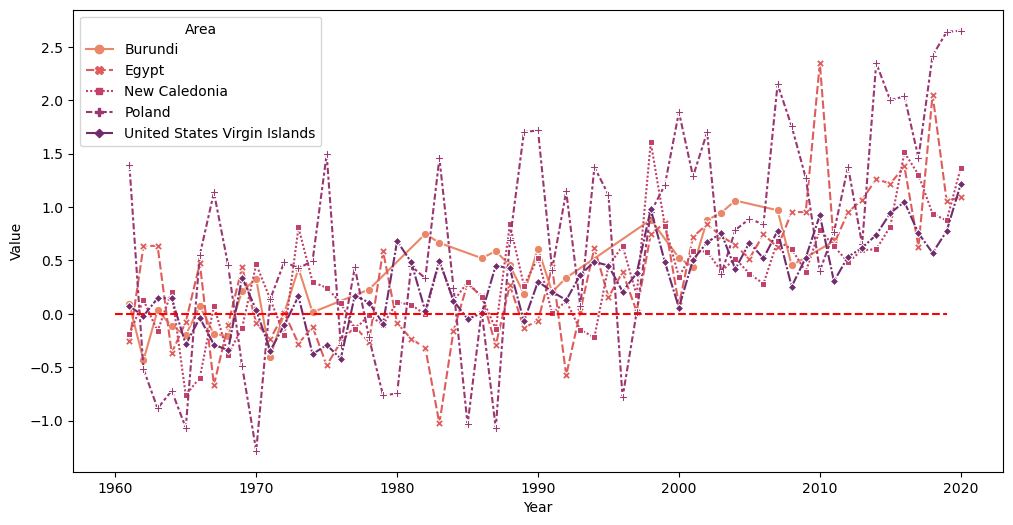

In [99]:
np.random.seed(555)
rand_area = np.random.choice(df_year.Area.unique(), size= 5)
plt.figure(figsize = (12,6))
sns.lineplot(data= df_year[df_year["Area"].isin(rand_area)], x= "Year", y="Value", hue= "Area", style= "Area",
             markers=True, palette="flare")
plt.hlines(0.0,xmin = 1960, xmax = 2019, color = "r", linestyles= "--")
plt.show()

### 2020 temperature differences on a geomap

In [100]:
country_lat_long = pd.read_json("country_lat_long.json", orient="records")
country_lat_long[["country", "latitude", "longitude"]] = 0
for x in range(country_lat_long.shape[0]):
    country_lat_long.loc[x ,"country"] = country_lat_long.loc[x].values[0]["country"]
    country_lat_long.loc[x ,"latitude"] = country_lat_long.loc[x].values[0]["latitude"]
    country_lat_long.loc[x ,"longitude"] = country_lat_long.loc[x].values[0]["longitude"]
country_lat_long.rename(columns= {"country" : "Area"}, inplace = True)

In [101]:
df_year = df_year.merge(country_lat_long, how= "inner", on= "Area")
df_year.drop(columns = ["ref_country_codes"], inplace=True)
df_geo_year = gpd.GeoDataFrame(df_year, geometry= gpd.points_from_xy (df_year.longitude , df_year.latitude ))
df_geo_year

,Area,Year,Value,latitude,longitude,geometry
0,Afghanistan,1961,-0.121,33.0,65.0,POINT (65.00000 33.00000)
1,Afghanistan,1962,-0.171,33.0,65.0,POINT (65.00000 33.00000)
2,Afghanistan,1963,0.841,33.0,65.0,POINT (65.00000 33.00000)
3,Afghanistan,1964,-0.779,33.0,65.0,POINT (65.00000 33.00000)
4,Afghanistan,1965,-0.254,33.0,65.0,POINT (65.00000 33.00000)
...,...,...,...,...,...,...
11394,Zimbabwe,2016,1.470,-20.0,30.0,POINT (30.00000 -20.00000)
11395,Zimbabwe,2017,0.443,-20.0,30.0,POINT (30.00000 -20.00000)
11396,Zimbabwe,2018,0.747,-20.0,30.0,POINT (30.00000 -20.00000)
11397,Zimbabwe,2019,1.359,-20.0,30.0,POINT (30.00000 -20.00000)


In [102]:
def plot_map(year):
    f = px.choropleth(df_geo_year, locationmode= "country names", locations=df_geo_year[df_geo_year.Year == year].Area.values,
                      color=df_geo_year[df_geo_year.Year == year].Value)
    f.show()

In [103]:
ipywidgets.interact(plot_map, year = (1960, 2020, 10))

interactive(children=(IntSlider(value=1990, description='year', max=2020, min=1960, step=10), Output()), _dom_…

<function __main__.plot_map(year)>

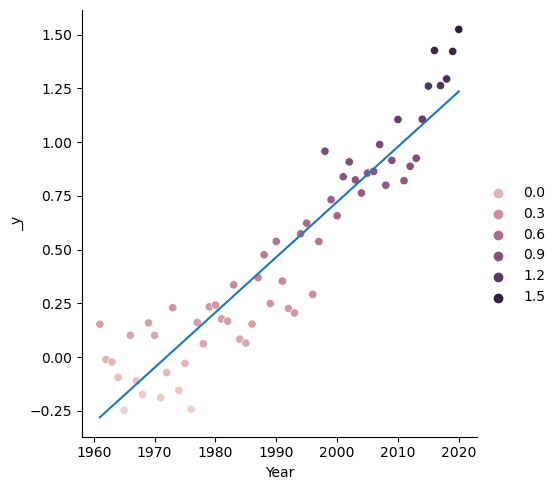

<AxesSubplot:xlabel='Value', ylabel='Count'>

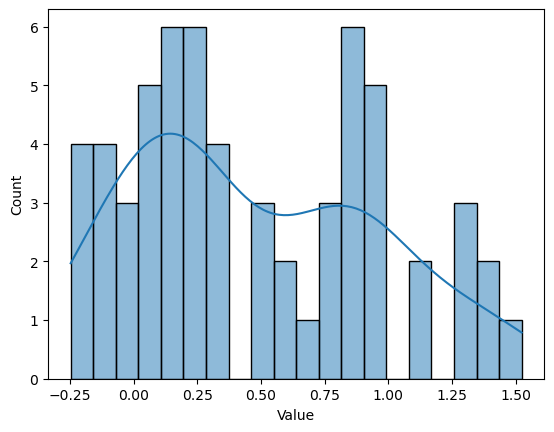

In [104]:
df_temp_world = df_geo_year.groupby("Year").mean("Value")["Value"]
sns.relplot(x = df_temp_world.index , y = df_temp_world.values, hue = df_temp_world.values, legend= True)
fit = np.polyfit(df_temp_world.index, df_temp_world.values, 1)
sns.lineplot(x = df_temp_world.index, y = fit[1] + fit[0] * df_temp_world.index, legend=False)
plt.show()
sns.histplot(df_temp_world, bins = 20, kde= True)

## Hypothesis Testing

According to 
World of Change: Global Temperatureshttps://earthobservatory.nasa.gov

* The average global temperature has increased by a little more than 1° Celsius (2° Fahrenheit) since 1880

* Hypothesis Tests for One Population Mean when Sigma is Unknown

**H0: μ = 1 , HA1: μ ≠ 1 , HA2 :μ < 1 , HA3: μ > 1 , α = 0.05**

$
T.S. = \frac{\bar x-\mu_0}{\sigma/\sqrt{n}}
$

In [105]:
null_hypo_mean = 1
alpha = 0.05
df_temp_world2 = df_temp_world.loc[1980:]
TS = (df_temp_world2.mean() - null_hypo_mean) / (df_temp_world2.std() / np.sqrt(df_temp_world2.count()))
dof = df_temp_world2.count() - 1
print(TS)

-4.6716032548367785


In [106]:
import scipy.stats

In [107]:
# HA1
t_critical = scipy.stats.t.ppf(q= 1 - alpha,df=dof) # Two sided
print(-t_critical < TS < t_critical)

False


#### At the 5% significance, the data provides sufficient evidence to conclude that temperature change is smaller than 1 C (HA2 :μ < 1) Reject H0

In [108]:
# HA2
t_critical = scipy.stats.t.ppf(q=alpha,df=dof) # left sided
print(TS < -1 * t_critical)

True


In [109]:
# HA3
t_critical = scipy.stats.t.ppf(q= 1 - alpha,df=dof) # right sided
print(TS > t_critical)

False


## Linear Regression to predict future temperature

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
x = df_temp_world.index.values.reshape(-1, 1)
y = df_temp_world.values.reshape(-1, 1)
reg = LinearRegression(fit_intercept=True).fit(x, y)
future = np.arange(2022, 2052)
print(reg.coef_)
print(reg.intercept_)
print(reg.get_params())

[[0.02568165]]
[-50.64171295]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


<Figure size 1200x800 with 0 Axes>

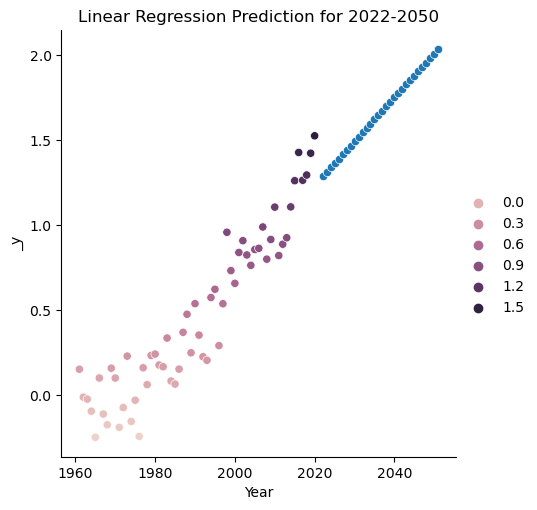

In [112]:
plt.figure(figsize= (12,8))
sns.relplot(x = df_temp_world.index , y = df_temp_world.values, hue = df_temp_world.values, legend= True)
sns.scatterplot(x = future, y = reg.coef_[0] * future + reg.intercept_, legend=False)
plt.title("Linear Regression Prediction for 2022-2050")
plt.show()

> Some Closure Notes from (https://www.activesustainability.com/climate-change/what-happen-planet-temperature-rises-half-degree/?_adin=02021864894)

* We would experience, for example, an alarming rise in sea level, exposing 69 million people to disasters like flooding in coastal areas. The biodiversity loss we would suffer through an increase of 1.5°C would be catastrophic, but if the rise were to be in the order of 2°C, the problem would be completely irreversible due to the disappearance of plant, animal and insect species, including the death of practically all coral reefs.

* Many of our planet’s ecosystems are at risk of radical changes which will kill off their natural biomes. With an increase in the global temperature of the planet of 2°C, some 13% of land, from tundra to forests, would suffer these changes, signifying irrevocable imbalances in their flora and fauna. If the increase is in the order of 1.5°C, the reduction of land area would be down to 4%.

* Also, the higher the temperature, the bigger the impact on the Arctic permafrost, 35% to 47% of which would melt with a rise of 2°C, down to 21% if the rise in the global temperature we suffer is 1.5°C.

* A variation in the temperature increase of +/-0.5°C would not have the same impact in all the planet’s areas or ecosystems; global warming consequences such as extinction will occur where species no longer have the ability to fight back.